In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### データを生成する

In [11]:
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100)

x = [1, 2, 3]
y = [4, 5, 6]

x = ["a", "b", "c"]
y = [4, 5, 6]

### とりあえずグラフを作成してみる

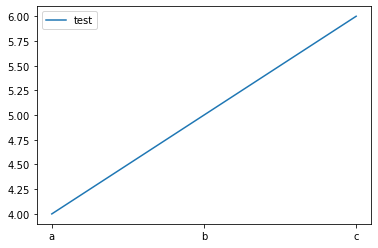

In [12]:
fig = plt.figure()  # figureオブジェクトを作成
ax = fig.add_subplot(1, 1, 1)  # figureに属するaxesオブジェクトを作成
ax.plot(x, y, label="test")
ax.legend()

### DataFrameをグラフにする

In [43]:
data = [{"p1": 1, "p2": 2}, {"p1": 3, "p2": 4}]

df = pd.DataFrame(data, index=["test1", "test2"])

In [44]:
df

,p1,p2
test1,1,2
test2,3,4


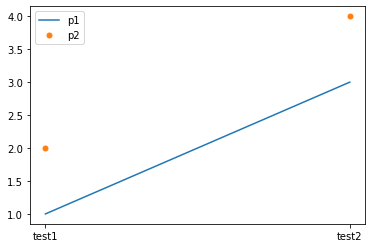

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 1])  # メモリ位置のリスト
# ax.set_xticklabels(["a", "b"])  # 表示値のリスト

# axでplotするとこうなる？
ax.plot(df["p1"], label="p1", linestyle="-", marker="", markersize=15)
ax.plot(df["p2"], label="p2", linestyle="", marker=".", markersize=10)
ax.legend()

# dfでプロットするとこれ。結果は同じ
# df.plot(ax=ax, legend=True)

### グラフのタイトルを表示する

<AxesSubplot:>

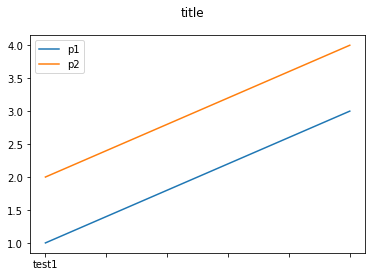

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.suptitle("title")
df.plot(ax=ax, legend=True)